In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

df_all = pd.concat([df_train, df_test], axis=0, sort=True).reset_index(drop=True)

print(f'df_train shape {df_train.shape}, df_test shape {df_test.shape}, df_all shape {df_all.shape}')

df_train shape (891, 12), df_test shape (418, 11), df_all shape (1309, 12)


In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
df_all.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
619,26.0,NaN,S,10.5000,"Gavey, Mr. Lawrence",0,620,2,male,0,0.0,31028
1175,2.0,NaN,S,20.2125,"Rosblom, Miss. Salli Helena",1,1176,3,female,1,NaN,370129
409,NaN,NaN,S,25.4667,"Lefebre, Miss. Ida",1,410,3,female,3,0.0,4133
30,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,31,1,male,0,0.0,PC 17601
508,28.0,NaN,S,22.5250,"Olsen, Mr. Henry Margido",0,509,3,male,0,0.0,C 4001


In [5]:
df_all.Sex.unique()

array(['male', 'female'], dtype=object)

In [6]:
df_all.Sex.replace({'male': 1, 'female': 0}, inplace=True)

/tmp/ipykernel_17/3330321790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all.Sex.replace({'male': 1, 'female': 0}, inplace=True)
/tmp/ipykernel_17/3330321790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all.Sex.replace({'male': 1, 'female': 0}, inplace=True)


# Missing Values

In [7]:
df_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Age missing values

In [8]:
df_all.select_dtypes(include=['number']).corr()['Age'].abs()

Age            1.000000
Fare           0.178740
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
Sex            0.063645
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [9]:
df_all.Pclass.unique()

array([3, 1, 2])

In [10]:
df_all['Age'] = df_all.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


## Age fixed

In [11]:
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Embarked Missing values

In [12]:
df_all[df_all.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,0,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,0,0,1.0,113572


In [13]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

## Fare Missing Values

In [14]:
df_all[df_all.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,1,0,NaN,3701


In [15]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'Embarked']).Fare.median()[3][0]['S']
df_all.Fare.fillna(med_fare, inplace=True)

/tmp/ipykernel_17/3622618406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all.Fare.fillna(med_fare, inplace=True)


## Cabin Missing Values

In [16]:
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [17]:
cabins = set()
for cabin in df_all.Cabin.unique():
    if pd.notna(cabin):
        cabins.add(cabin[0])
cabins = list(cabins)
cabins.sort()
print(cabins)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


In [18]:
df_all.Cabin = df_all.Cabin.apply(lambda x: x[0] if pd.notna(x)  else x)

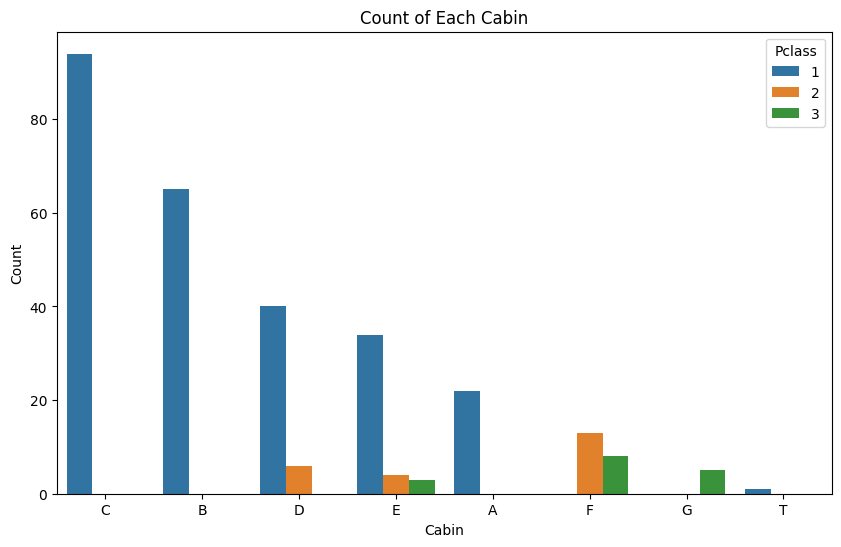

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_all, x='Cabin', order=df_all['Cabin'].value_counts().index, hue='Pclass')
plt.title('Count of Each Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()


In [20]:
df_all.Cabin.replace(['A', 'B', 'C', 'T'], 'ABCT', inplace=True)
df_all.Cabin.replace(['D', 'E'], 'DE', inplace=True)
df_all.Cabin.replace(['F', 'G'], 'FG', inplace=True)

/tmp/ipykernel_17/2483488010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all.Cabin.replace(['A', 'B', 'C', 'T'], 'ABCT', inplace=True)


In [21]:
df_all.Cabin.fillna('M', inplace=True)

<Axes: xlabel='Cabin', ylabel='count'>

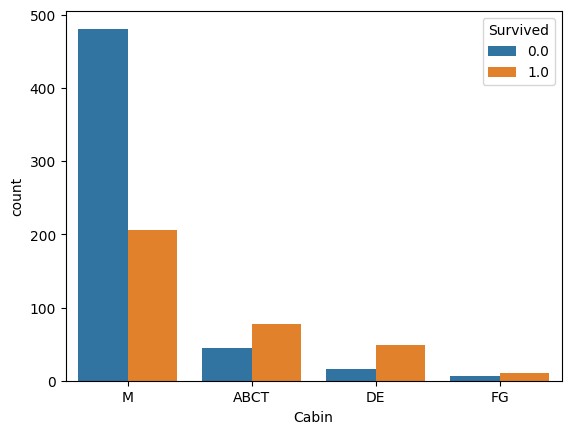

In [22]:
sns.countplot(data=df_all, x='Cabin' , hue='Survived')

In [23]:
df_all.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [25]:
df_all.select_dtypes('number').corr()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1.000000,0.198707,-0.134239,0.020478,-0.451983,0.074529,-0.204025,-0.058635
Fare,0.198707,1.000000,0.221668,0.031027,-0.558742,-0.185745,0.160389,0.257307
Parch,-0.134239,0.221668,1.000000,0.008942,0.018322,-0.213125,0.373587,0.081629
PassengerId,0.020478,0.031027,0.008942,1.000000,-0.038354,0.013406,-0.055224,-0.005007
Pclass,-0.451983,-0.558742,0.018322,-0.038354,1.000000,0.124617,0.060832,-0.338481
Sex,0.074529,-0.185745,-0.213125,0.013406,0.124617,1.000000,-0.109609,-0.543351
SibSp,-0.204025,0.160389,0.373587,-0.055224,0.060832,-0.109609,1.000000,-0.035322
Survived,-0.058635,0.257307,0.081629,-0.005007,-0.338481,-0.543351,-0.035322,1.000000


In [26]:
df_all.Age.describe()

count    1309.000000
mean       29.261398
std        13.218275
min         0.170000
25%        22.000000
50%        26.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


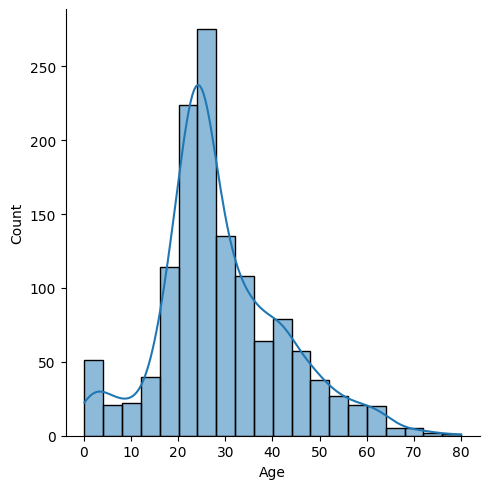

In [27]:
sns.displot(df_all, x='Age', kde=True, bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


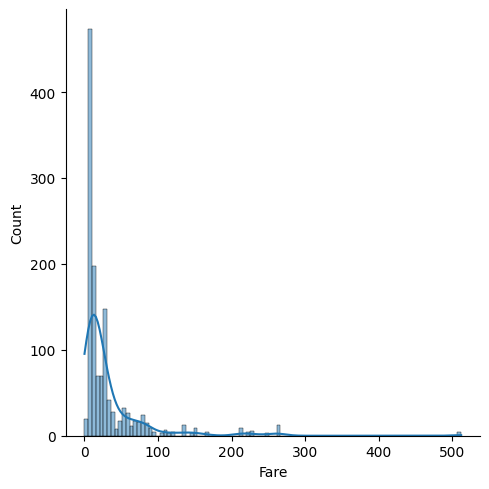

In [28]:
sns.displot(df_all, x='Fare', kde=True, bins=100)

In [29]:
df_all.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [30]:
df_all.groupby(['SibSp', 'Survived']).size()

SibSp  Survived
0      0.0         398
       1.0         210
1      0.0          97
       1.0         112
2      0.0          15
       1.0          13
3      0.0          12
       1.0           4
4      0.0          15
       1.0           3
5      0.0           5
8      0.0           7
dtype: int64

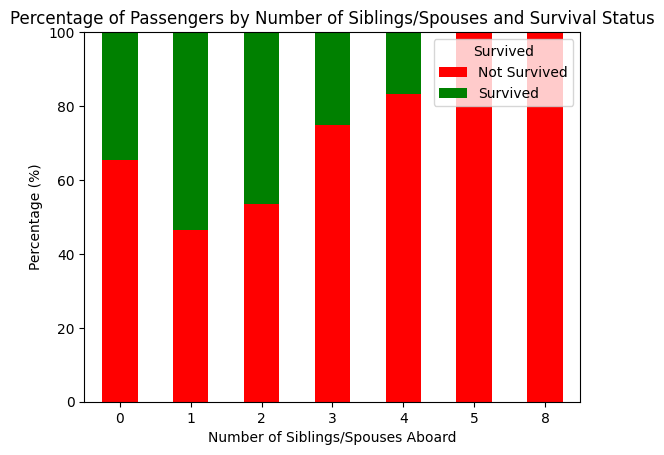

In [31]:
count_data = df_all.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Calculate percentages
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
ax = percentage_data.plot(kind='bar', stacked=True, color=['red', 'green'])

# Customizing the plot
plt.title('Percentage of Passengers by Number of Siblings/Spouses and Survival Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

In [32]:
df_all.SibSp = df_all.SibSp.map({0: 'Alone', 1:'Small', 2:'Small', 3:'Medium', 4:'Medium', 5:'Large', 8:'Large'})
df_all.SibSp.unique()

array(['Small', 'Alone', 'Medium', 'Large'], dtype=object)

In [33]:
df_all['Title'] = df_all.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]
df_all.groupby(['Title', 'Survived']).size()
df_all.Title = df_all.Title.str.strip()

In [34]:
df_all.Name.str.split(',', expand=True)[1].str.split(' ', expand=True)[3].value_counts().head(10)

3
Henry      24
William    18
John       15
James      15
J          12
Joseph     12
H          11
Charles    10
Edward      9
A           8
Name: count, dtype: int64

In [35]:
df_all.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   object 
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [37]:
df_all['Is_Married'] = 0
df_all.loc[df_all['Title'] == 'Mrs', 'Is_Married'] = 1

In [38]:
df_all['Is_Married'].unique()

array([0, 1])

In [39]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Is_Married'],
      dtype='object')

In [40]:
df_all.drop(['Ticket', 'Name'], axis=1,inplace=True)

In [41]:
df_all.groupby(['Title', 'Survived']).size()

Title         Survived
Capt          0.0           1
Col           0.0           1
              1.0           1
Don           0.0           1
Dr            0.0           4
              1.0           3
Jonkheer      0.0           1
Lady          1.0           1
Major         0.0           1
              1.0           1
Master        0.0          17
              1.0          23
Miss          0.0          55
              1.0         127
Mlle          1.0           2
Mme           1.0           1
Mr            0.0         436
              1.0          81
Mrs           0.0          26
              1.0          99
Ms            1.0           1
Rev           0.0           6
Sir           1.0           1
the Countess  1.0           1
dtype: int64

In [42]:
Titles = {'Lady': 'Miss', 'Miss': 'Miss', 'Mrs':'Miss', 'Ms':'Miss', 'Mr':'Mr', 'Capt': 'Work', 'Rev': 'Work', 'Col':'Work', 'Dr':'Work', 'Jonkheer':'Work', 'Major':'Work','Master':'Highness', 'Sir':'Highness', }
df_all.Title = df_all.Title.map(Titles).fillna('Other')

In [43]:
df_all.groupby(['Title', 'Survived']).size()

Title     Survived
Highness  0.0          17
          1.0          24
Miss      0.0          81
          1.0         228
Mr        0.0         436
          1.0          81
Other     0.0           1
          1.0           4
Work      0.0          14
          1.0           5
dtype: int64

In [44]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Parch        1309 non-null   int64  
 5   PassengerId  1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Sex          1309 non-null   int64  
 8   SibSp        1309 non-null   object 
 9   Survived     891 non-null    float64
 10  Title        1309 non-null   object 
 11  Is_Married   1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [45]:
df_all.Pclass = df_all.Pclass.astype(str)

In [46]:
df_all.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [47]:
features = df_all.select_dtypes(include=['object']).columns.tolist()
features

['Cabin', 'Embarked', 'Pclass', 'SibSp', 'Title']

In [48]:
df_all.select_dtypes('number').corr()

,Age,Fare,Parch,PassengerId,Sex,Survived,Is_Married
Age,1.000000,0.198707,-0.134239,0.020478,0.074529,-0.058635,0.204468
Fare,0.198707,1.000000,0.221668,0.031027,-0.185745,0.257307,0.140653
Parch,-0.134239,0.221668,1.000000,0.008942,-0.213125,0.081629,0.217673
PassengerId,0.020478,0.031027,0.008942,1.000000,0.013406,-0.005007,0.034473
Sex,0.074529,-0.185745,-0.213125,0.013406,1.000000,-0.543351,-0.566111
Survived,-0.058635,0.257307,0.081629,-0.005007,-0.543351,1.000000,0.339040
Is_Married,0.204468,0.140653,0.217673,0.034473,-0.566111,0.339040,1.000000


In [49]:
for feature in features:
    print(f'{feature} uniques values{df_all[feature].unique()}')

Cabin uniques values['M' 'ABCT' 'DE' 'FG']
Embarked uniques values['S' 'C' 'Q']
Pclass uniques values['3' '1' '2']
SibSp uniques values['Small' 'Alone' 'Medium' 'Large']
Title uniques values['Mr' 'Miss' 'Highness' 'Other' 'Work']


In [50]:
final_df = pd.concat([df_all.drop(features, axis=1), pd.get_dummies(df_all[features], drop_first=True)], axis=1)

In [51]:
final_df.head()

,Age,Fare,Parch,PassengerId,Sex,Survived,Is_Married,Cabin_DE,Cabin_FG,Cabin_M,...,Embarked_S,Pclass_2,Pclass_3,SibSp_Large,SibSp_Medium,SibSp_Small,Title_Miss,Title_Mr,Title_Other,Title_Work
0,22.0,7.2500,0,1,1,0.0,0,False,False,True,...,True,False,True,False,False,True,False,True,False,False
1,38.0,71.2833,0,2,0,1.0,1,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,26.0,7.9250,0,3,0,1.0,0,False,False,True,...,True,False,True,False,False,False,True,False,False,False
3,35.0,53.1000,0,4,0,1.0,1,False,False,False,...,True,False,False,False,False,True,True,False,False,False
4,35.0,8.0500,0,5,1,0.0,0,False,False,True,...,True,False,True,False,False,False,False,True,False,False


## Data split

In [52]:
final_df.Survived.unique()

array([ 0.,  1., nan])

In [53]:
df_result = final_df[pd.isna(final_df.Survived)].copy()
passengerIDs_result = df_result.PassengerId

df_result.drop(['Survived', 'PassengerId'], inplace=True, axis=1)

df_train = final_df[pd.notna(final_df.Survived)]
df_train.drop('PassengerId', axis=1, inplace=True)
print(f'Test {df_result.shape}, Train {df_train.shape}')

Test (418, 19), Train (891, 20)


/tmp/ipykernel_17/29507858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('PassengerId', axis=1, inplace=True)


In [54]:
df_result.head()

,Age,Fare,Parch,Sex,Is_Married,Cabin_DE,Cabin_FG,Cabin_M,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_Large,SibSp_Medium,SibSp_Small,Title_Miss,Title_Mr,Title_Other,Title_Work
891,34.5,7.8292,0,1,0,False,False,True,True,False,False,True,False,False,False,False,True,False,False
892,47.0,7.0000,0,0,1,False,False,True,False,True,False,True,False,False,True,True,False,False,False
893,62.0,9.6875,0,1,0,False,False,True,True,False,True,False,False,False,False,False,True,False,False
894,27.0,8.6625,0,1,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False
895,22.0,12.2875,1,0,1,False,False,True,False,True,False,True,False,False,True,True,False,False,False


In [55]:
X = df_train.drop('Survived', axis=1)
y = df_train.Survived

## Scale Inputs

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X_scaled = scaler.fit_transform(X)

In [59]:
X_result_scaled = scaler.transform(df_result)

# Model

In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
skfold = StratifiedKFold(8)
model = RandomForestClassifier(oob_score=True)

In [63]:
scores = cross_val_score(model, X_scaled, y, cv=skfold)

In [64]:
scores

array([0.79464286, 0.82142857, 0.8125    , 0.81081081, 0.85585586,
       0.72972973, 0.81981982, 0.87387387])

In [65]:
scores.mean()

0.8148326898326899

In [66]:
from sklearn.model_selection import GridSearchCV


In [67]:
from sklearn.metrics import classification_report, accuracy_score

In [68]:
skfold = StratifiedKFold(5)
model = RandomForestClassifier(random_state=42)
hyperParams = {'n_estimators':[89, 89, 90, 91, 92, 100, 103], 'min_samples_split':[2, 3, 4, 5], 'criterion':['entropy', 'log_loss'], 'max_features':['sqrt', 'log2', None], 'max_depth':[7, 8, 9, 11]}
gridSearch = GridSearchCV(model, hyperParams, scoring='accuracy', cv=skfold)
gridSearch.fit(X_scaled, y)
print(gridSearch.best_score_)
print(gridSearch.best_params_)
y_pred = gridSearch.predict(X_scaled)
print(classification_report(y, y_pred))
print(accuracy_score(y, y_pred))

0.8439959826752872
{'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 89}
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       549
         1.0       0.95      0.87      0.91       342

    accuracy                           0.93       891
   macro avg       0.94      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891

0.9337822671156004


In [69]:
y_pred = gridSearch.predict(X_result_scaled)

In [70]:
result = pd.DataFrame({
    'PassengerId': passengerIDs_result,
    'Survived': y_pred
})

In [71]:
result.head(10)

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0
896,897,0.0
897,898,0.0
898,899,0.0
899,900,1.0
900,901,0.0


In [72]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.8 KB


In [73]:
result.Survived = result.Survived.astype('int64')

In [74]:
result.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [75]:
result.to_csv('submission.csv', header=True, index=False)

In [76]:
sub = pd.read_csv('./submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [77]:
# from xgboost import XGBClassifier
# skfold = StratifiedKFold(5)
# model = XGBClassifier()
# hyperParams = {'n_estimators':list(range(1, 4)), 'learning_rate':list(np.linspace(0.5, .7, 30)), 'max_depth':list(range(2,6))}
# gridSearch = GridSearchCV(model, hyperParams, scoring='accuracy', cv=skfold)
# gridSearch.fit(X_scaled, y)
# print(gridSearch.best_score_)
# print(gridSearch.best_params_)
# y_pred = gridSearch.predict(X_scaled)
# print(classification_report(y, y_pred))
# print(accuracy_score(y, y_pred))